# Explore target and potential features

## Prepare notebook

Import libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc
import warnings
warnings.filterwarnings("ignore")

Import functions from source code

In [2]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex
sys.path.append('../src/visualization')
from visualize import plot_bar, plot_stacked, count_res

Load clean data

In [3]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations

In [4]:
weight = df['weight']
calc = wc.Calculator('weight')

## Explore target

Target is survey responses to: <br> <b>Who did you vote for in the election for President?<b>

Calculate weighted distribution of responses to "who did you vote for in the election for President?" across <b>eight</b> classes 

In [5]:
pres_freq = calc.distribution(df, 'presvote16post_2016').round(3)
pres_list = ['Clinton', 'Trump', 'Johnson', 'Stein',
     'McMullin', 'Other', 'Did not vote', 'No Response']
for ind, val in enumerate(pres_freq):
    print(pres_list[ind], val)

Clinton 0.406
Trump 0.399
Johnson 0.027
Stein 0.012
McMullin 0.002
Other 0.016
Did not vote 0.008
No Response 0.13


Visualize weighted distribution of responses to "who did you vote for in the election for President"? across <b>eight</b> classes 

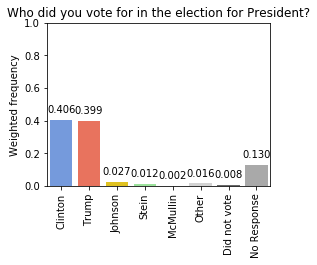

In [6]:
x = pres_list
y = list(pres_freq)
palette = ['cornflowerblue', 'tomato', 'gold', 'lightgreen',
           'purple', 'lightgrey', 'dimgrey', 'darkgray']
title = 'Who did you vote for in the election for President?'
xlabels = pres_list
pres_plt = plot_bar(x, y, palette, title, xlabels)
for bar in pres_plt.patches: #add value to top of each bar
    pres_plt.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Calculate weighted distribution of responses to "who did you vote for in the election for President?" across <b>three</b> classes

In [10]:
pres_cat_list = ['Clinton', 'Trump', 'Other behavior']
pres_cat_freq = calc.distribution(df, 'vote_3cat').round(3)

for ind, val in enumerate(pres_cat_freq):
    print(pres_cat_list[ind], val)

Clinton 0.406
Trump 0.399
Other behavior 0.195


Visualize weighted distribution of responses to "who did you vote for in the election for President"? across <b>three</b> classes 

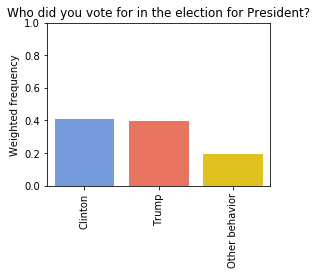

In [9]:
x = pres_cat_list
y = list(pres_cat_freq)
palette_short = ['cornflowerblue','tomato','lightgrey']
title = 'Who did you vote for in the election for President?'
xlabels = pres_cat_list

cat_plt = plot_bar(x, y, palette, title, xlabels)

## Explore attributes

Which attributes are correlated with the target when we have <b>eight</b> classes?

In [11]:
df.corr()['presvote16post_2016'].sort_values(ascending=False).head(10)[1:9]

vote_for_against_2016      0.831710
vote_3cat                  0.814751
vote_regrets_2016          0.797544
votemeth16_2016            0.677630
accurately_counted_2016    0.650837
turnout16_2016             0.526559
post_presvote12_2012       0.358575
fav_hrc_2016               0.320787
Name: presvote16post_2016, dtype: float64

Which attributes are correlated with the target when we have <b>three</b> classes?

In [12]:
df.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:9]

presvote16post_2016      0.814751
vote_for_against_2016    0.703509
fav_hrc_2016             0.619090
obamaapp_2016            0.616283
fav_obama_2016           0.578415
Clinton_Cruz_2016        0.570247
pid7_2016                0.559367
Clinton_Rubio_2016       0.546756
Name: vote_3cat, dtype: float64

Both lists show that the survey questions that ask about party affiliation, approval of Obama, and ticket options (e.g. Clinton/Cruz) coorelate the most strongly with the target. 

Now that I compared the three category target versus eight, I will use the three category target variable moving forward. 

Next, I look at other attributes that might be used as features to create a predictive model by topic area<br><br>

### Community engagement

Using the survey guide, select attributes to represent community engagement and generate lists of the attribute names

In [13]:
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)

col2_list = ['CIVIC_PARTICIPATION_2016',
             'pew_churatd_2016',
             'volunteer_baseline',
             'volunteerf_baseline',
             'volunteernum_baseline'
             ]

Print the number of community engagement attributes used and show the top of the dataframe with just the target and community engagement features

In [14]:
target = ['vote_3cat']
df_comm_engag = df[(col_list + col2_list + target)]
print('number of community engagement attributes:', len(col_list + col2_list))
df_comm_engag.head()

number of community engagement attributes: 22


,volunteerorg2_1_baseline,volunteerorg2_2_baseline,volunteerorg2_3_baseline,volunteerorg2_4_baseline,volunteerorg2_5_baseline,volunteerorg2_6_baseline,volunteerorg2_7_baseline,volunteerorg2_8_baseline,volunteerorg2_9_baseline,volunteerorg2_10_baseline,...,volunteerorg2_14_baseline,volunteerorg2_15_baseline,volunteerorg2_16_baseline,volunteerorg2_17_baseline,CIVIC_PARTICIPATION_2016,pew_churatd_2016,volunteer_baseline,volunteerf_baseline,volunteernum_baseline,vote_3cat
0,2,2,2,2,2,2,1,2,2,2,...,2,2,2,2,3.0,5.0,1.0,8.0,1.0,1.0
1,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,5.0,1.0,1.0,8.0,1.0,2.0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,6.0,5.0,2.0,2.0,8.0,1.0
3,2,2,2,2,1,2,2,2,2,2,...,2,2,2,1,5.0,5.0,1.0,8.0,3.0,3.0
4,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,4.0,1.0,2.0,1.0,1.0,2.0


Check how strongly these attributes correlate with the target

In [15]:
df_comm_engag.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:10]

volunteerorg2_6_baseline     0.079310
volunteerorg2_4_baseline     0.061510
CIVIC_PARTICIPATION_2016     0.053554
volunteerorg2_12_baseline    0.053367
volunteerorg2_7_baseline     0.053001
volunteerorg2_3_baseline     0.041190
volunteerorg2_10_baseline    0.040977
volunteerorg2_13_baseline    0.032248
volunteernum_baseline        0.027982
Name: vote_3cat, dtype: float64

### Religion 

Using the survey guide, select attributes to represent the importance of religion and created a list of the attribute names

In [16]:
col_list = ['pew_churatd_2016',
            'pew_religimp_2016',
            'pew_bornagain_2016',
            'pew_prayer_2016',
            'religpew_2016'
            ]

Print the number of religion attributes used and show the top of the dataframe with just the target and religion features

In [17]:
print('number of religion features:', len(col_list))
df_religion = df[(col_list + target)]
df_religion.head()

number of religion features: 5


,pew_churatd_2016,pew_religimp_2016,pew_bornagain_2016,pew_prayer_2016,religpew_2016,vote_3cat
0,5.0,3,2.0,6.0,2.0,1.0
1,1.0,1,2.0,1.0,3.0,2.0
2,5.0,4,2.0,3.0,2.0,1.0
3,5.0,3,2.0,3.0,11.0,3.0
4,1.0,1,2.0,2.0,3.0,2.0


Check how strongly these attributes correlate with the target

In [18]:
df_religion.corr()['vote_3cat'].sort_values(ascending=False).head(10)[1:10]

pew_churatd_2016     -0.125100
religpew_2016        -0.129768
pew_prayer_2016      -0.150176
pew_bornagain_2016   -0.152011
pew_religimp_2016    -0.179026
Name: vote_3cat, dtype: float64

### Issue Importance

Set regular expressions pattern to match columns with issue questions

In [19]:
pattern = '(imiss_).{1}(_2016)'

Call function to return list

In [20]:
col_list = filter_col_with_regex(df, pattern)
df_issue = df[col_list + target]

In [21]:
print('number of issue features:', len(col_list))
df_issue = df[(col_list + target)]
df_issue.head()

number of issue features: 23


,imiss_a_2016,imiss_b_2016,imiss_c_2016,imiss_d_2016,imiss_e_2016,imiss_f_2016,imiss_g_2016,imiss_h_2016,imiss_i_2016,imiss_j_2016,...,imiss_o_2016,imiss_p_2016,imiss_q_2016,imiss_r_2016,imiss_s_2016,imiss_t_2016,imiss_u_2016,imiss_x_2016,imiss_y_2016,vote_3cat
0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,4.0,2.0
2,1.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0,4.0,1.0,...,1.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
3,1.0,2.0,3.0,1.0,1.0,2.0,3.0,2.0,4.0,1.0,...,1.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0


Check how strongly these attributes correlate with the target

In [22]:
df_issue.corr()['vote_3cat'].sort_values(ascending=False).head(10)

vote_3cat       1.000000
imiss_l_2016    0.395681
imiss_g_2016    0.331644
imiss_y_2016    0.324188
imiss_x_2016    0.286479
imiss_d_2016    0.285567
imiss_i_2016    0.219071
imiss_q_2016    0.181965
imiss_k_2016    0.158439
imiss_n_2016    0.142047
Name: vote_3cat, dtype: float64

Check the tail for strength of negative correlations

In [23]:
df_issue.corr()['vote_3cat'].sort_values(ascending=False).tail(10)

imiss_t_2016    0.043139
imiss_o_2016   -0.007340
imiss_b_2016   -0.012280
imiss_c_2016   -0.106580
imiss_a_2016   -0.106932
imiss_e_2016   -0.118500
imiss_f_2016   -0.118852
imiss_r_2016   -0.121574
imiss_p_2016   -0.223021
imiss_u_2016   -0.272860
Name: vote_3cat, dtype: float64

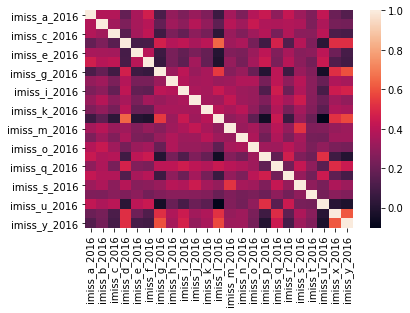

In [24]:
corr = df[col_list].corr()
figsize=(20,9)
sns.heatmap(corr)

#### Climate change

Add weights to dataframe with issue attributes and target

In [25]:
df_issue = df_issue.join(weight)
grouped = df_issue.groupby(['vote_3cat'])

In [38]:
df_bins = df_issue.loc[(df.vote_3cat == 1)| (df.vote_3cat == 2)]
grouped_bins = df_bins.groupby('vote_3cat')

Look at weighted responses to importance of <b>climate change</b>

In [41]:
clim_weighted = calc.distribution(grouped_bins, 'imiss_l_2016').round(3)
clim_weighted

imiss_l_2016,1.0,2.0,3.0,4.0,8.0
vote_3cat,,,,,
1.0,0.657,0.235,0.060,0.023,0.025
2.0,0.115,0.214,0.266,0.390,0.015


Create stacked bar plots of weighted response frequency by target class for <b>climate change</b>

In [ ]:
data = clim_weighted
title = 'Climate change'
plot_stacked(data, title)
plt.show()

#### The Budget deficit

View weighted responses to importance of <b>the Budget deficit</b>

In [ ]:
budget_weighted = calc.distribution(grouped, 'imiss_p_2016').round(3)
budget_weighted

Create stacked bar plots of weighted response frequency by target class for <b>the Budget deficit</b>

In [ ]:
title = 'The Budget deficit' 
plot_stacked(budget_weighted, title)
plt.show()

#### Abortion

Print weighted responses to importance of <b>abortion</b>

In [40]:
abort_weighted = calc.distribution(grouped_bins, 'imiss_t_2016').round(3)
print(abort_weighted)

imiss_t_2016    1.0    2.0    3.0    4.0    8.0
vote_3cat                                      
1.0           0.376  0.321  0.180  0.098  0.024
2.0           0.383  0.279  0.196  0.126  0.017


Create stacked bar plots of weighted response frequency by target class for <b>abortion</b> 

In [ ]:
title = 'Abortion' 
plot_stacked(abort_weighted, title)
plt.show()

####  Size of government

Print weighted responses to importance of <b>size of government</b>

In [39]:
gov_weighted = calc.distribution(grouped_bins, 'imiss_u_2016').round(3)
print(gov_weighted)

imiss_u_2016    1.0    2.0    3.0    4.0    8.0
vote_3cat                                      
1.0           0.175  0.369  0.318  0.111  0.028
2.0           0.630  0.288  0.056  0.007  0.019


Create stacked bar plots of weighted response frequency by target class for <b>size of government</b>

In [ ]:
plot_stacked(gov_weighted, title)
plt.show()

#### The environment

In [ ]:
env_weighted = calc.distribution(grouped, 'imiss_d_2016').round(3)
title = 'Environment' 
env_plt = plot_stacked(env_weighted, title)
plt.show()

In [ ]:
crime = calc.distribution(grouped, 'imiss_a_2016').round(3)
crime

In [ ]:
econ = calc.distribution(grouped, 'imiss_b_2016').round(3)
econ

In [ ]:
im = calc.distribution(grouped, 'imiss_c_2016').round(3)
im

In [ ]:
im = calc.distribution(grouped, 'imiss_o_2016').round(3)
im

#### All issues plotted

In [ ]:
issues = ['crime', 'the economy', 'immigration', 'the environment', 'religious liberty', 'terrorism', 'gay rights', 'education', 'family and medical leave', 'health care', 'money in politics', 'climate change', 'social security', 'infrastructure investment', 'jobs', 'the budget deficit', 'poverty', 'taxes', 'medicare', 'abortion', 'the size of government', 'racial quality', 'gender equality']
cap = []
for issue in issues:
    cap.append(issue.capitalize())
issues = cap

In [ ]:
for ind, col in enumerate(col_list):
    freq = calc.distribution(grouped, col).round(3)
    iss_plt = plot_stacked(freq, issues[ind])

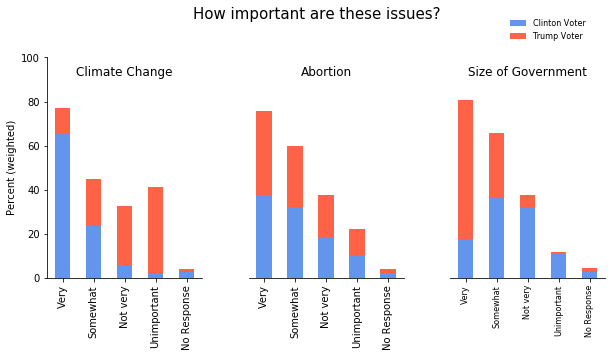

In [140]:
palette_short = ['cornflowerblue','tomato','white']
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharex=True, sharey=True, figsize=(10,3.5))
clim_weighted.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax1)
abort_weighted.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax2)
gov_weighted.T.plot(kind='bar', stacked=True, color=palette_short, ax=ax3)
ax1.set_title('Climate Change', y=.89)
ax2.set_title('Abortion', y=.89)
ax3.set_title('Size of Government', y=.89)
pres_cat_list = ['Clinton Voter', 'Trump Voter']
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

N = 5 
ind = np.arange(N)
x_ticks = ('Very','Somewhat','Not very', 'Unimportant', 'No Response')
plt.xticks(ind, x_ticks, fontsize=8)
frame1 = plt.gca()
ax1.get_yaxis().set_label('Weighted frequency')
frame1.axes.get_yaxis().set_visible(False)
frame1.axes.set_ylim(0,1)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
plt.subplots_adjust(top=1, wspace=.3)
fig.suptitle('How important are these issues?', y=1.2, fontsize=15, ha='center')
ax1.set_ylabel('Percent (weighted)')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax1.set_yticklabels([0, 20, 40, 60, 80, 100])
ax3.legend(pres_cat_list, fontsize=8, loc='upper center', bbox_to_anchor=(.63,1.2), borderpad=.2, frameon=False)
plt.savefig('three_barplts.png')
plt.show()



#### Check counts for each issue

Subset issue dataframe into the three classes

In [ ]:
df_clint = df_issue.loc[df_issue.vote_3cat == 1]
df_trump = df_issue.loc[df_issue.vote_3cat  == 2]
df_other_behav = df_issue.loc[df_issue.vote_3cat  == 3]
cat_df_list = [df_clint, df_trump, df_other_behav]

In [ ]:
df_clint.columns

Reset the index, drop the old index, drop vote category and weight columns, print the number of attributes 

In [ ]:
for df in cat_df_list:
    df.reset_index(drop=True, inplace=True)
    df.drop(columns=['vote_3cat','weight'], inplace=True)
    print(len(df.columns))

Check that index has been reset

In [ ]:
df_clint.head()
df_trump.head()
df_other_behav.head()

Call count function and save as variable and then make a list of those variables

In [ ]:
clint_count = count_res(df_clint)
trump_count = count_res(df_trump)
other_behav_count = count_res(df_other_behav)
counts = [clint_count, trump_count, other_behav_count]

Check that the number of likert scale responses is equal to number expected per candidate

In [ ]:
print(df_clint.shape[0]*23 == sum(clint_count.values()))
print(df_trump.shape[0]*23 == sum(trump_count.values()))
print(df_other_behav.shape[0]*23 == sum(other_behav_count.values()));

Plot counts for each likert scale category for Clinton, Trump, and other behavior

In [ ]:
bar_clint = list(clint_count.values())
bar_trump = list(trump_count.values())
bar_other_behav = list(other_behav_count.values())

bar_width = 0.25

r1 = np.arange(5)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
plt.bar(r1, bar_clint, width=bar_width, color=palette[0])
plt.bar(r2, bar_trump, width=bar_width, color=palette[1])
plt.bar(r3, bar_other_behav, width=bar_width, color=palette[-1])
plt.title('Response counts by vote for Clinton, Trump, and Other Behavior')
plt.xticks([r + bar_width for r in range(len(bar_clint))],
           ['Very', 'Somewhat', 'Not very', 'Unimportant', 'No response'])
plt.ylabel('Count')
plt.show()

Need to do: 
* Weight the counts 
* What if I grouped survey response counts by candidate and tried to get the distribution using the calculator lib? 
* Make a dataframe with rows as Clinton, Trump, and Other behavior then make the columns the counts ? But then how do I add the weights in? Sum them? 